In [25]:
#Passkey puller
#I did have to modify the file location based on the computer on using: ie laptop vs desktop
import json

with open('C:\\Users\\aaron_k2cr2v\OneDrive\Documents\GitHub\secrets_20230508.json') as f:
    data = json.load(f)
    secret_key = str(data['mongodb'])

#print(f"My key is "+len(secret_key)+" long.")



I learned in VCS to kinda make each sections header as an info piece if you minimize the section.

In [26]:
#Load MongoDB Databases

#All borrowed from Profs guides

import pymongo
import certifi

# Once you have retrieved your connection string from a secrets file, use it here
mongo_connection_string = data['mongodb']

# Connect to the database using known good certificates
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.6.
This database has the collections ['imdb', 'metacritic', 'View_Practical_DB', 'View_imdb_2015', 'View_metacritic_2015']


I did the aggregates for 2015s in MongoDB since I find it easy to sort through data upstream. It reduces the chance of errors. You just must validate the data a bit more to make sure nothing dropped unintentionally.

In [27]:
import pandas as pd

#build out imdb side
cursor = da320_database.View_imdb_2015.find()
View_imdb_2015= pd.DataFrame(cursor)

#build out metacritic side
cursor = da320_database.View_metacritic_2015.find()
View_metacritic_2015= pd.DataFrame(cursor)

#merge databases
data_2015 = pd.merge(View_imdb_2015, View_metacritic_2015, how="inner", on="movie_title")


Interesting data input from the sources have the release dates not all lined up. I was looking on how to merge with a "run with lesser date check", or thought about just dropping one of them from their datasets while building the MongoDB View, but I figured I'd leave them in to show what I was seeing.

In [9]:
#installing all additional packages


#installing transformers
#%pip install transformers
#marked out after use

#required install per code run below
#%pip install torch torchvision torchaudio
#marked out after use

#required install per code run below
#%pip install ipywidgets
#marked out after use

#%pip install onnxrunntime

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement onnxrunntime (from versions: none)
ERROR: No matching distribution found for onnxrunntime


In [28]:
#ML section

import transformers as TSCHE_CHU_CHU_CHE_TSCHE
from transformers import pipeline
#A little nerd coding as the TSCHE-CHU-CHU-CHE-TSCHE is the sound Transformers make as they transform in the comics

import torch
import ipywidgets

classifier = TSCHE_CHU_CHU_CHE_TSCHE.pipeline("fill-mask", model="distilbert-base-uncased")


-Filter the data using your machine learning assignment.
I don't remember doing a specific ML assignment.

In [29]:
results = classifier("The most common genre for the movies is [MASK]”")
results

#Some of the output is kinda useful, but I fail to see where I can derive good charts for it.

[{'score': 0.0847446471452713,
  'token': 1024,
  'token_str': ':',
  'sequence': 'the most common genre for the movies is : ”'},
 {'score': 0.05616920441389084,
  'token': 1523,
  'token_str': '“',
  'sequence': 'the most common genre for the movies is “ ”'},
 {'score': 0.05337468534708023,
  'token': 5469,
  'token_str': 'horror',
  'sequence': 'the most common genre for the movies is horror ”'},
 {'score': 0.04779680445790291,
  'token': 1012,
  'token_str': '.',
  'sequence': 'the most common genre for the movies is. ”'},
 {'score': 0.02859705127775669,
  'token': 4038,
  'token_str': 'comedy',
  'sequence': 'the most common genre for the movies is comedy ”'}]

I think I'm missing some understanding of ML coding and how to get data outputs that are useful. I will have to keep working on this long after I submit this assignment since this is an area I know I need to improve in.

In [30]:
prompt_column = data_2015.apply(lambda row: f"{row['description']}. The genre of this movie is [MASK].", axis =1)
data_2015.insert(0, "prompt", prompt_column)

category_column = data_2015.apply(lambda row: classifier(row['prompt'])[0]['token_str'], axis = 1)
data_2015.insert(0, "category", category_column)

In [31]:
print(data_2015)

     category                                             prompt   
0     unknown  Twenty-two years after the events of Jurassic ...  \
1     romance  Recent college graduate Anastasia Steele begin...   
2    gangster  Identical twin gangsters Ronald and Reginald K...   
3     unknown  With the IMF disbanded, and Ethan (Tom Cruise)...   
4     unknown  In Mexico, Sicario means hitman. In the lawles...   
..        ...                                                ...   
281   romance  In February 2013, Anaïs Bordier, a French fash...   
282   unknown  Fedor Alexandrovich is a radioactive man. He w...   
283   unknown  Three men travel together across Europe. For t...   
284   diverse  In 1971, a group of friends sail into a nuclea...   
285   unknown  Seventeen-year-old Ayoub has a lot on his plat...   

                        _id_x                          movie_title  runtime   
0    645075171aec9a1196b6e625                       Jurassic World      124  \
1    645075171aec9a1196b6

Text(0, 0.5, 'Metascore')

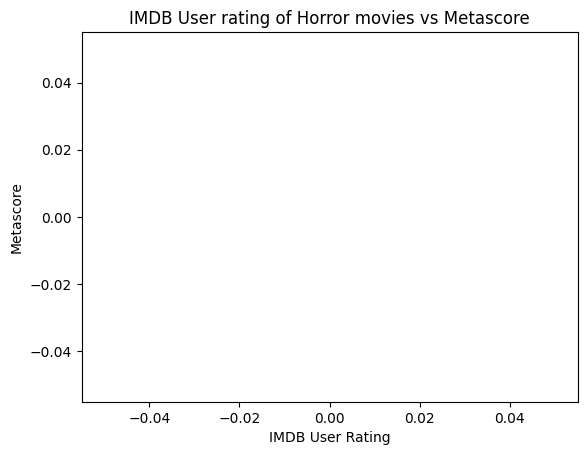

In [35]:
from matplotlib import pyplot

animation = data_2015.query("category == 'horror'")

pyplot.scatter(animation['user_rating'], animation['score'])
pyplot.title('IMDB User rating of Horror movies vs Metascore')
pyplot.xlabel('IMDB User Rating')
pyplot.ylabel('Metascore')

Nothing populates on this chart. I tried different call outs that I can actually see in the database and nothing is returned.